In [ ]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
import time
from sklearn.metrics import accuracy_score

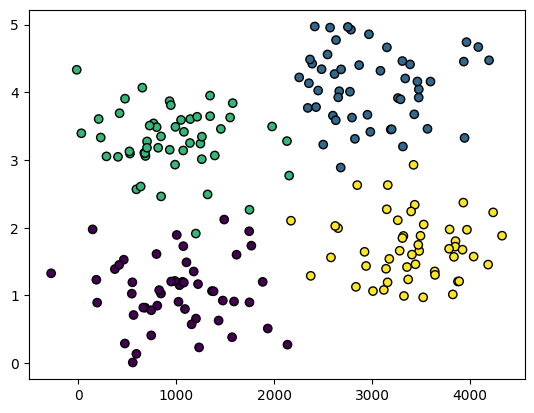

In [ ]:
blob_centers = ([1, 1], [3, 4], [1, 3.3], [3.5, 1.8])
X, y = make_blobs(n_samples=200,
                          centers=blob_centers,
                          cluster_std=0.5,
                          random_state=0)

X[:, 0] *= 1000

plt.scatter(X[:, 0], X[:, 1], c=y,  edgecolors='black',linewidth=1)

In [ ]:
clf = MLPClassifier(hidden_layer_sizes=(6,),
                    random_state=1).fit(X, y)

In [ ]:
print("Веса между входным и скрытым слоем:")
print(clf.coefs_[0])
print("\nВеса между скрытым и выходным слоем:")
print(clf.coefs_[1])

Веса между входным и скрытым слоем:
[[-0.09809877  0.33667051 -0.82024119 -0.29720839 -0.56852789 -0.66056109]
 [-0.58903611 -0.31219238 -0.22424296  0.11423652 -0.18324369  0.37321781]]

Веса между скрытым и выходным слоем:
[[-0.51316658 -0.43365467  0.43189995  0.68148414]
 [-0.24370005  0.34328608  0.57835494  0.57889271]
 [-0.59713359 -0.67678056 -0.46609801  0.54011704]
 [-0.5769702  -0.10221922  0.75476969  0.00610289]
 [ 0.34285864 -0.25645017  0.33417991  0.47281254]
 [-0.7006119   0.35515533  0.80295119  0.33880635]]


In [ ]:
for i in range(len(clf.coefs_)):
    number_neurons_in_layer = clf.coefs_[i].shape[1]
    for j in range(number_neurons_in_layer):
        weights = clf.coefs_[i][:,j]
        print(i, j, weights, end=", ")
        print()
    print()

0 0 [-0.09809877 -0.58903611], 
0 1 [ 0.33667051 -0.31219238], 
0 2 [-0.82024119 -0.22424296], 
0 3 [-0.29720839  0.11423652], 
0 4 [-0.56852789 -0.18324369], 
0 5 [-0.66056109  0.37321781], 

1 0 [-0.51316658 -0.24370005 -0.59713359 -0.5769702   0.34285864 -0.7006119 ], 
1 1 [-0.43365467  0.34328608 -0.67678056 -0.10221922 -0.25645017  0.35515533], 
1 2 [ 0.43189995  0.57835494 -0.46609801  0.75476969  0.33417991  0.80295119], 
1 3 [0.68148414 0.57889271 0.54011704 0.00610289 0.47281254 0.33880635], 



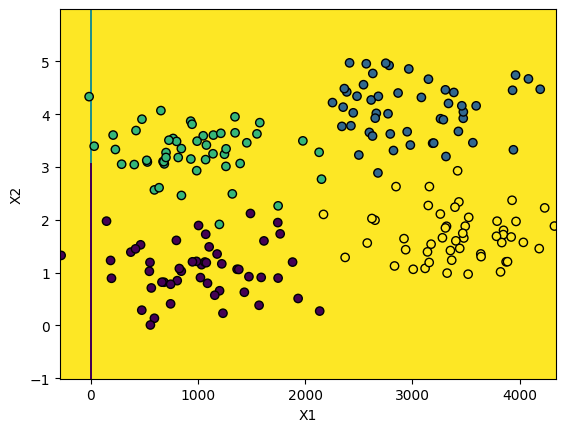

In [ ]:
X0 = np.linspace(X[:, 0].min()-1,X[:, 0].max()+1, X.shape[0])
X1 = np.linspace(X[:, 1].min()-1,X[:, 1].max()+1, X.shape[0])
X0_grid, X1_grid = np.meshgrid(X0, X1)

y_predict = clf.predict(np.c_[X0_grid.ravel(),X1_grid.ravel()]).reshape(X0_grid.shape)
plt.pcolormesh(X0_grid, X1_grid, y_predict)

plt.scatter(X[:, 0], X[:, 1], c=y,  edgecolors='black',linewidth=1)
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_scaled = scaler.fit_transform(X)
X_scaled = scaler.transform(X)
X_scaled = scaler.transform(X)

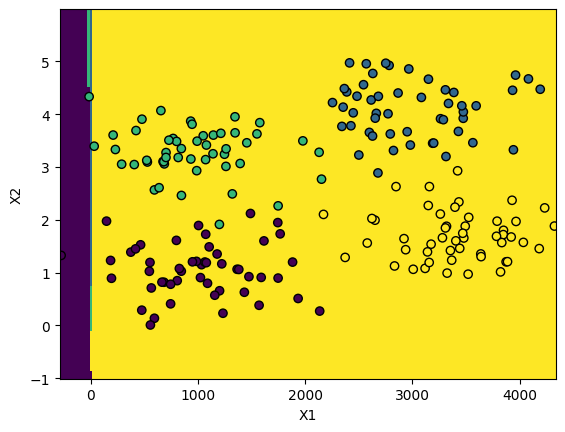

In [ ]:
clf = MLPClassifier(hidden_layer_sizes=(10, 10, 10, 10, 10, 10), max_iter=100_000).fit(X_scaled, y)
X0 = np.linspace(X[:, 0].min()-1,X[:, 0].max()+1, X.shape[0])
X1 = np.linspace(X[:, 1].min()-1,X[:, 1].max()+1, X.shape[0])
X0_grid, X1_grid = np.meshgrid(X0, X1)

y_predict = clf.predict(np.c_[X0_grid.ravel(),X1_grid.ravel()]).reshape(X0_grid.shape)
plt.pcolormesh(X0_grid, X1_grid, y_predict)

plt.scatter(X[:, 0], X[:, 1], c=y,  edgecolors='black',linewidth=1)
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

# 1. Создайте однослойный перцептрон с 1, 2, 10 и 100 нейронами. Сравние их точность и сделайте вывод о достаточном количестве нейронов.

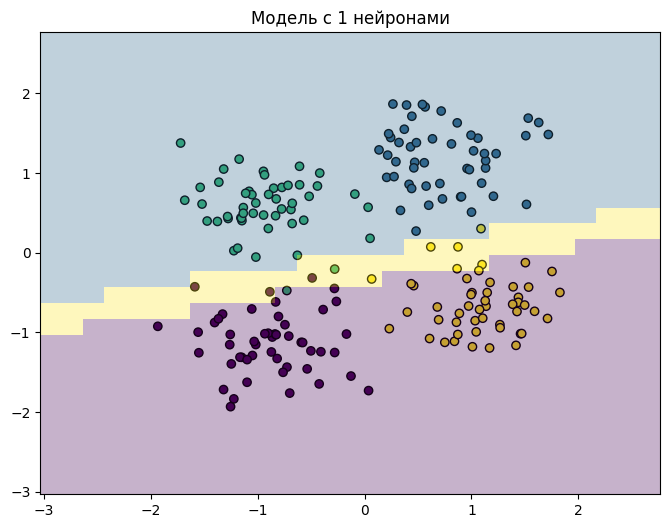

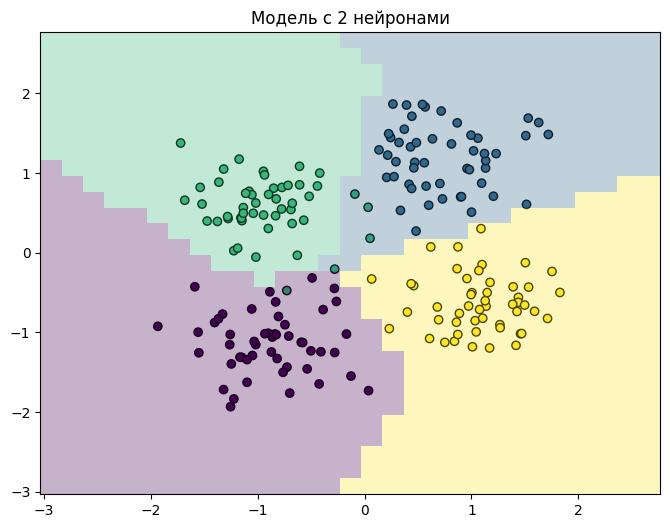

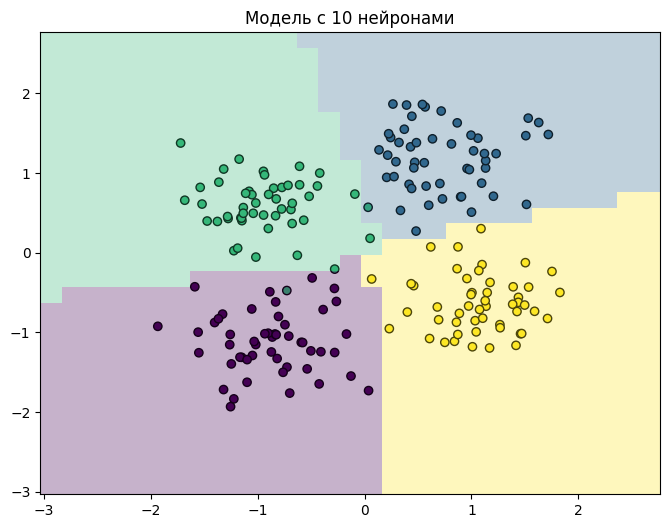

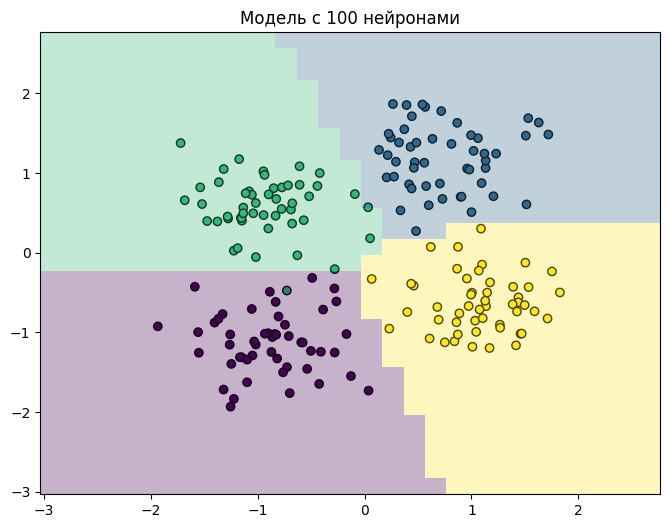

In [ ]:
# Создание синтетических данных
blob_centers = ([1, 1], [3, 4], [1, 3.3], [3.5, 1.8])
X, y = make_blobs(n_samples=200,
                  centers=blob_centers,
                  cluster_std=0.5,
                  random_state=0)

X[:, 0] *= 1000
accuracy_train = []
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

neurons_list = [1, 2, 10, 100]

for neurons in neurons_list:
    clf = MLPClassifier(hidden_layer_sizes=(neurons,), max_iter=100_000)
    clf.fit(X_scaled, y)

    train_pred = clf.predict(X_scaled)
    accuracy_train.append(accuracy_score(y, train_pred))

    plt.figure(figsize=(8, 6))
    plt.title(f'Модель с {neurons} нейронами')
    plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y, edgecolors='black', linewidth=1)

    x_min, x_max = X_scaled[:, 0].min() - 1, X_scaled[:, 0].max() + 1
    y_min, y_max = X_scaled[:, 1].min() - 1, X_scaled[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.2), np.arange(y_min, y_max, 0.2))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.pcolormesh(xx, yy, Z, alpha=0.3, cmap='viridis')

    plt.show()

In [ ]:
n = [1, 2, 10, 100]
pd.DataFrame({'Кол-во нейронов': n, 'Качество': accuracy_train})

,Кол-во нейронов,Качество
0,1,0.500
1,2,0.975
2,10,0.990
3,100,0.995


# 2. Создайте и оцените модель с двумя, тремя и десятью скрытыми слоями с одинаковым количеством нейронов. Сравните их точность и сделайте вывод о достаточном количестве слоев.

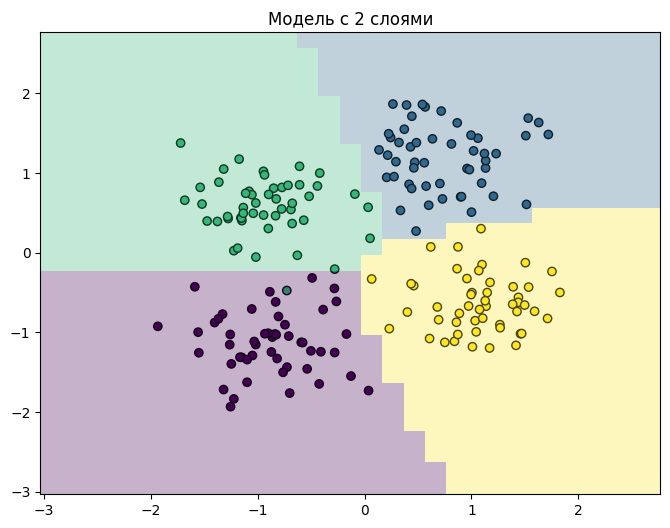

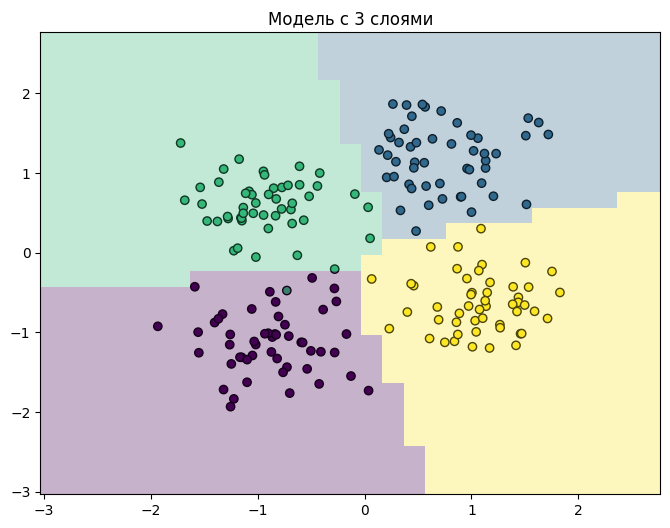

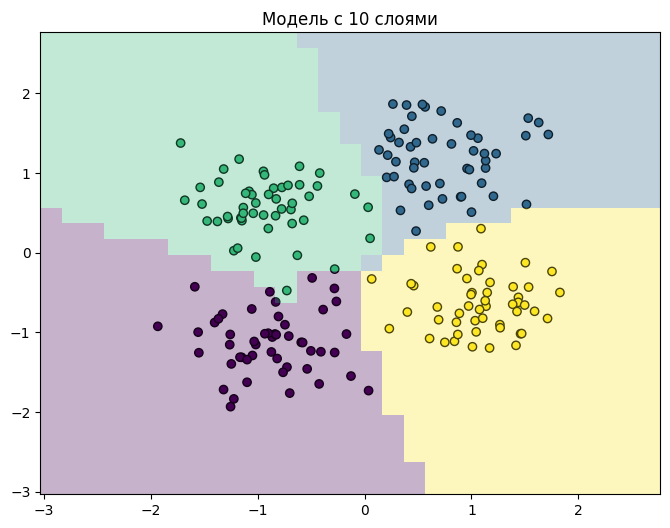

In [ ]:
# Создание синтетических данных
blob_centers = ([1, 1], [3, 4], [1, 3.3], [3.5, 1.8])
X, y = make_blobs(n_samples=200,
                  centers=blob_centers,
                  cluster_std=0.5,
                  random_state=0)

X[:, 0] *= 1000
accuracy_train = []
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

sloy_list = [2, 3, 10]

for sloy in sloy_list:
    clf = MLPClassifier(hidden_layer_sizes=(50,) * sloy, max_iter=100_000)
    clf.fit(X_scaled, y)

    train_pred = clf.predict(X_scaled)
    accuracy_train.append(accuracy_score(y, train_pred))

    plt.figure(figsize=(8, 6))
    plt.title(f'Модель с {sloy} слоями')
    plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y, edgecolors='black', linewidth=1)

    x_min, x_max = X_scaled[:, 0].min() - 1, X_scaled[:, 0].max() + 1
    y_min, y_max = X_scaled[:, 1].min() - 1, X_scaled[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.2), np.arange(y_min, y_max, 0.2))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.pcolormesh(xx, yy, Z, alpha=0.3, cmap='viridis')

    plt.show()

In [ ]:
n = [2, 3, 10]
pd.DataFrame({'Кол-во слоёв': n, 'Качество': accuracy_train})

,Кол-во слоёв,Качество
0,2,0.995
1,3,0.995
2,10,1.000


# 3. Для глубокой модели выведите веса всех нейронов на всех слоях. Выведите значения векторов весов смещения.

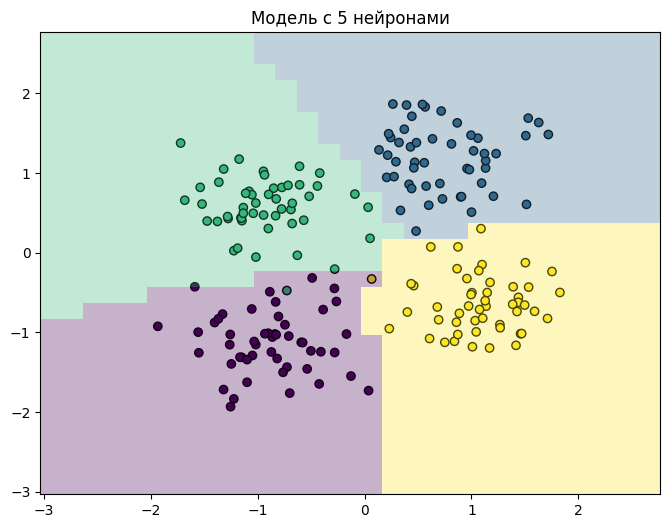

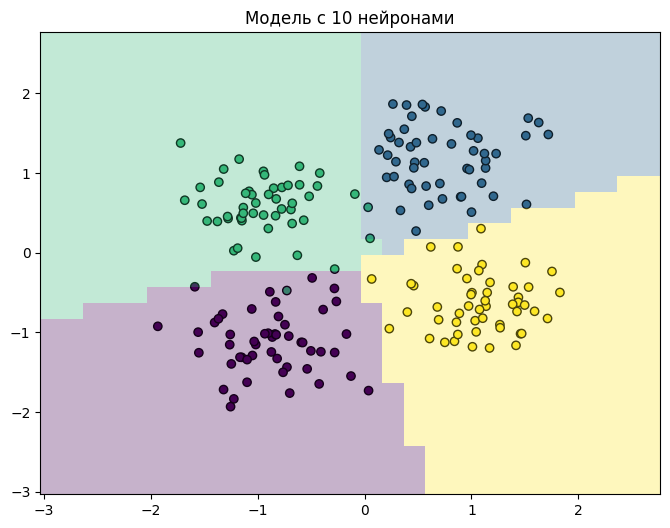

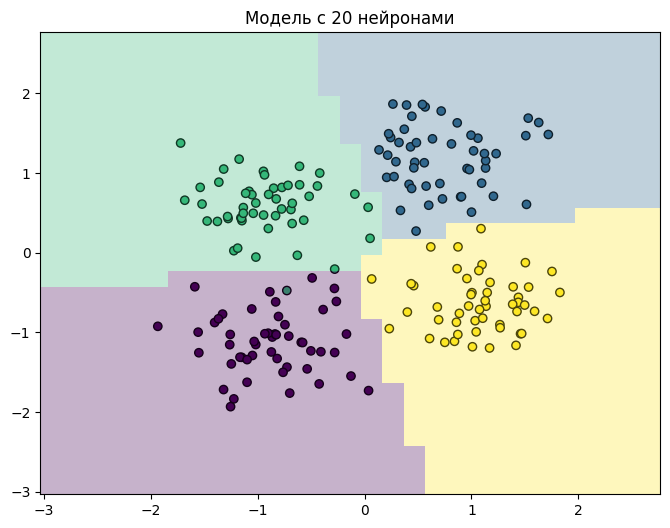

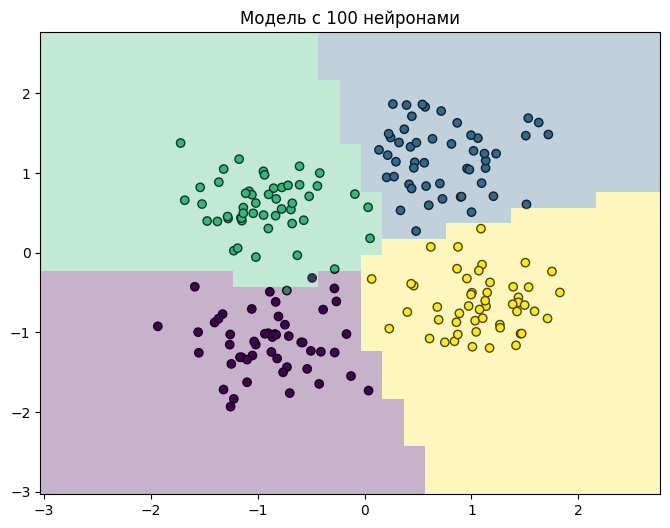

In [ ]:
# Создание синтетических данных
blob_centers = ([1, 1], [3, 4], [1, 3.3], [3.5, 1.8])
X, y = make_blobs(n_samples=200,
                  centers=blob_centers,
                  cluster_std=0.5,
                  random_state=0)

X[:, 0] *= 1000
clock, accuracy_train = [], []
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

neurons_list = [5, 10, 20, 100]

for neurons in neurons_list:
    clf = MLPClassifier(hidden_layer_sizes=(neurons, neurons + 1, neurons + 2), max_iter=100_000)
    start_time = time.time()
    clf.fit(X_scaled, y)
    clock.append(time.time() - start_time)

    train_pred = clf.predict(X_scaled)
    accuracy_train.append(accuracy_score(y, train_pred))

    plt.figure(figsize=(8, 6))
    plt.title(f'Модель с {neurons} нейронами')
    plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y, edgecolors='black', linewidth=1)

    x_min, x_max = X_scaled[:, 0].min() - 1, X_scaled[:, 0].max() + 1
    y_min, y_max = X_scaled[:, 1].min() - 1, X_scaled[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.2), np.arange(y_min, y_max, 0.2))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.pcolormesh(xx, yy, Z, alpha=0.3, cmap='viridis')

    plt.show()

In [ ]:
# веса всех нейронов
for i in range(len(clf.coefs_)):
    number_neurons_in_layer = clf.coefs_[i].shape[1]
    for j in range(number_neurons_in_layer):
        weights = clf.coefs_[i][:,j]
        print(i, j, weights, end=", ")
        print()
    print()

# векторы весов смещения
for i, intercept in enumerate(clf.intercepts_):
    print(f"Смещение {i+1} слоя:")
    print(intercept)
    print()

0 0 [-0.20045648  0.05814286], 
0 1 [-0.18011705 -0.2358463 ], 
0 2 [-0.04709409 -0.19504464], 
0 3 [-0.13499369  0.31767113], 
0 4 [0.02559299 0.01520117], 
0 5 [ 0.12173235 -0.2669495 ], 
0 6 [ 0.18861409 -0.15144204], 
0 7 [-0.07935465 -0.25421555], 
0 8 [ 0.169299   -0.22003384], 
0 9 [-0.11952598 -0.06052189], 
0 10 [-0.2866681   0.08865467], 
0 11 [ 0.27021733 -0.04459612], 
0 12 [-0.15282053  0.15206802], 
0 13 [-0.14894301  0.0435748 ], 
0 14 [ 0.28403265 -0.10984143], 
0 15 [0.30639313 0.14203168], 
0 16 [0.03260868 0.21078974], 
0 17 [-0.25030968  0.09148578], 
0 18 [ 0.20448558 -0.07325095], 
0 19 [-0.27896522 -0.30104157], 
0 20 [ 0.21091158 -0.18814859], 
0 21 [-0.22533884 -0.22330102], 
0 22 [0.07702223 0.30323602], 
0 23 [-0.0164008  -0.00089153], 
0 24 [-0.18170408 -0.09701374], 
0 25 [0.00247463 0.00037051], 
0 26 [-0.21616103  0.15804895], 
0 27 [-0.05894371 -0.1246336 ], 
0 28 [-0.04650514 -0.15289101], 
0 29 [-0.00483834  0.13425403], 
0 30 [-0.24313101 -0.05877158]

# 4. Постройте и оцените модель с большим количеством нейронов и слоев. Замерьте время выполнения обучения, сравните со временем обучения более простых моделей.

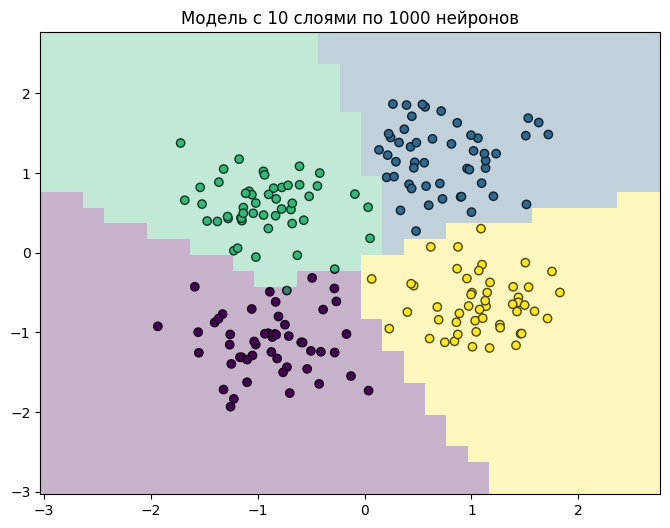

In [ ]:
clf = MLPClassifier(hidden_layer_sizes=([1000 for i in range(10)]), max_iter=100_000)
start_time = time.time()
clf.fit(X_scaled, y)
clock.append(time.time() - start_time)

train_pred = clf.predict(X_scaled)
accuracy_train.append(accuracy_score(y, train_pred))

plt.figure(figsize=(8, 6))
plt.title(f'Модель с 10 слоями по 1000 нейронов')
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y, edgecolors='black', linewidth=1)

x_min, x_max = X_scaled[:, 0].min() - 1, X_scaled[:, 0].max() + 1
y_min, y_max = X_scaled[:, 1].min() - 1, X_scaled[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.2), np.arange(y_min, y_max, 0.2))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.pcolormesh(xx, yy, Z, alpha=0.3, cmap='viridis')

plt.show()

In [ ]:
n = ['3 слоя: 5-7', '3 слоя: 10-12', '3 слоя: 20-22' , '3 слоя: 100-102', '10 слоев: 1000' ]
pd.DataFrame({'Кол-во нейронов': n, 'Время обучения': clock, 'Качество': accuracy_train})

,Кол-во нейронов,Время обучения,Качество
0,3 слоя: 5-7,0.939031,0.990
1,3 слоя: 10-12,0.966958,0.995
2,3 слоя: 20-22,0.977903,0.995
3,3 слоя: 100-102,0.787576,0.990
4,10 слоев: 1000,124.277227,1.000


# 5. Постройте и оцените модель классификации с помощью перцептрона на датасете, который вы использовали на контрольной по классификиации (если вы ее не выполняли, возьмите любой датасет из раздела "real world datasets" в библиотеке sklearn).

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import scipy.io
data = scipy.io.loadmat('/content/olivettifaces.mat')
from sklearn.datasets import fetch_olivetti_faces
faces = fetch_olivetti_faces()
X = faces.data
y = faces.target
# разделение датасета на тренировочную и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

clf = Perceptron()

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to /root/scikit_learn_data
Accuracy: 0.775


# 6. Постройте и оцените модель регрессии с помощью перцептрона на датасете, который вы использовали на контрольной по регрессии.

In [ ]:
from sklearn.datasets import fetch_openml
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

dataset = fetch_openml('LEV', version=1)
X = dataset.data
y = dataset.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

clf = Perceptron()
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

reg = Perceptron()
reg.fit(X_train, y_train)
y_pred_reg = reg.predict(X_test)
r2 = r2_score(y_test, y_pred_reg)
mse = mean_squared_error(y_test, y_pred_reg)
print("R2 score:", r2)
print("MSE:", mse)

Accuracy: 0.45
R2 score: -0.024719101123595433
MSE: 0.855


/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(
